The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Features**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (Desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [444]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [445]:
#import necessary basic libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [446]:
# read the data into dataframe
data= pd.read_csv("/content/drive/My Drive/Almabetter/capstone projects/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")

In [447]:
# data view
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [448]:
# Renaming the columns
data.rename(columns={'cigsPerDay':'cigarettes_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [449]:
# set column-'id' as the index.
data.set_index('id',inplace=True)
data

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [450]:
# shape of the dataset
data.shape

(3390, 16)

Data has 3390 observations, 15 predictors and a target variable.

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 3390 non-null   int64  
 1   education           3303 non-null   float64
 2   sex                 3390 non-null   object 
 3   is_smoking          3390 non-null   object 
 4   cigarettes_per_day  3368 non-null   float64
 5   bp_meds             3346 non-null   float64
 6   prevalent_stroke    3390 non-null   int64  
 7   prevalent_hyp       3390 non-null   int64  
 8   diabetes            3390 non-null   int64  
 9   total_cholesterol   3352 non-null   float64
 10  systolic_bp         3390 non-null   float64
 11  diastolic_bp        3390 non-null   float64
 12  BMI                 3376 non-null   float64
 13  heart_rate          3389 non-null   float64
 14  glucose             3086 non-null   float64
 15  ten_year_chd        3390 non-null   int64  
dtypes: flo

In [452]:
numerical_features=['age','cigarettes_per_day','total_cholesterol','systolic_bp','diastolic_bp','BMI','heart_rate','glucose']
categorical_features=['education','sex','is_smoking','bp_meds','prevalent_stroke','prevalent_hyp','diabetes']

In [453]:
# statistical description of the numerical features of the data
data.describe()

,age,education,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Observation:

* 3390 observations of behavioural, demographic and medical features of individuals(male/female) in the age-group(32-70).

#**DATA CLEANING**

**Missing Value Analysis**

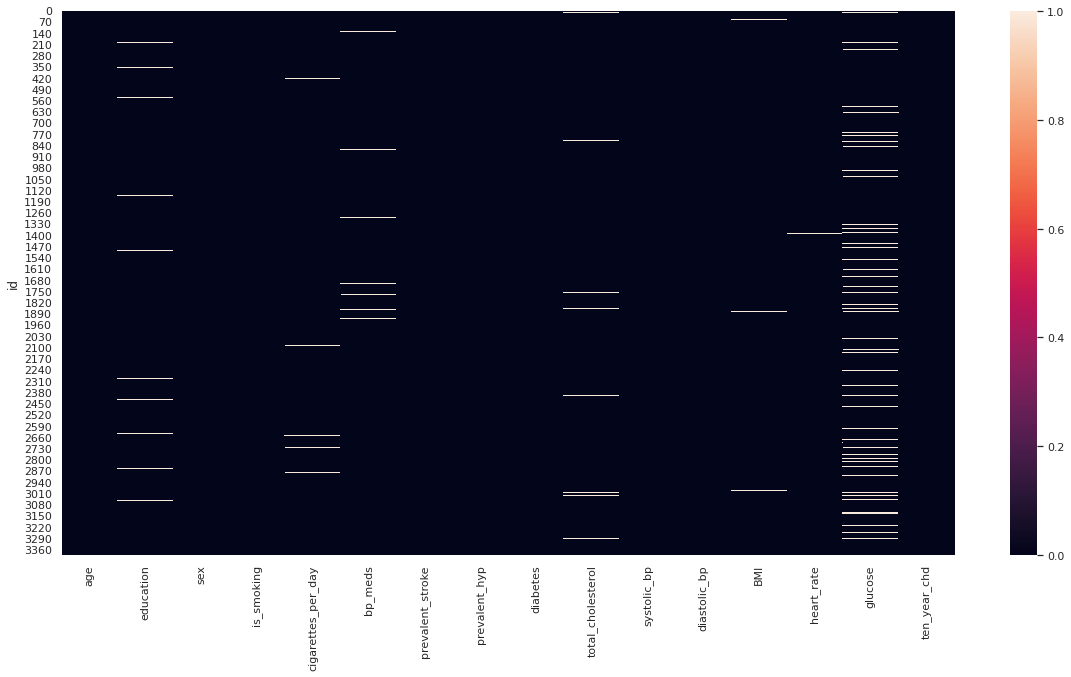

In [454]:
# using heatmap to visualize miising values in data
missing_data= data.isnull()
plt.figure(figsize=(20,10))
sns.heatmap(missing_data)

Dropping the missing data isn't a better choice since, the size of dataset is small. Therefore missing data is imputed with mode/median.

In [455]:
#function to  handle missing value for categorical variables with mode value
def categorical_missing(data,columns):
  '''The missing values in columns are imputed with the respective mode values'''
  for column in columns:
    data[column]=data[column].fillna(data[column].mode()[0])


In [456]:
# function call to insert missing values for variables - education, BPMeds
categorical_missing(data,['education','bp_meds'])


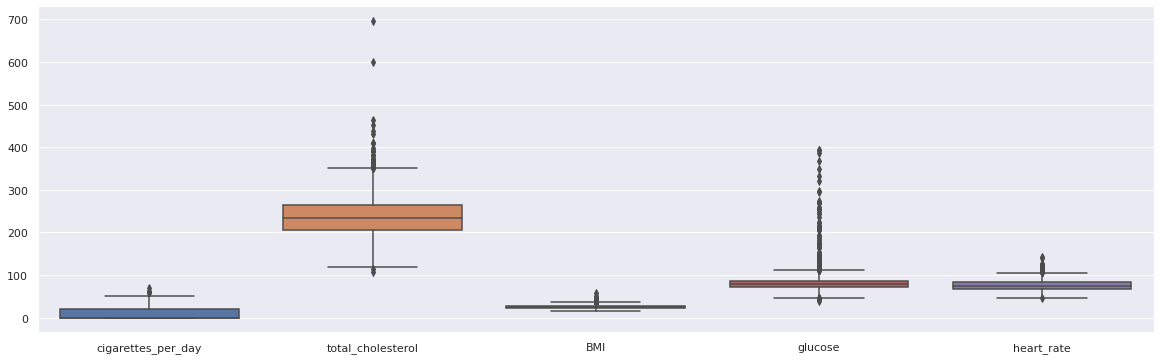

In [457]:
# boxplot for numerical features of data with missing values
plt.figure(figsize=(20,6))
cols=['cigarettes_per_day','total_cholesterol','BMI','glucose','heart_rate']
sns.boxplot(data=data[cols])

The numerical features with missing data have outliers. Therefore as the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value. 

In [458]:
data['cigarettes_per_day'].median()

0.0

Feature- 'cigarettes_per_day' is observed to have a median value: 0.0. The possible entries for feature 'is_smoking' are YES/NO. If the missing value for 'cigarettes_per_day' are imputed with median, it contradicts the entries in case where 'is_smoking' is marked as "YES".

A person marked as smoker cannot be using 0 cigarettes per day.  

Therefore, group the rows based on whether the person smokes, and then impute the missing values with the median of the grouped data.

In [459]:
# imputing the missing values of the column- 'cigarettes_per_day' with the median after grouping the data
data['cigarettes_per_day']= data['cigarettes_per_day'].fillna(data[data['is_smoking']=="YES"]['cigarettes_per_day'].median())


In [460]:
# check for any invalid observations
# invalid observation: where 'is_smoking'=1 and  'cigarettes_per_day'=1  or 'is_smoking'=0 and  'cigarettes_per_day'>0
data[(data['is_smoking']=="YES") & (data['cigarettes_per_day']==0) | (data['is_smoking']=="NO") & (data['cigarettes_per_day']>0)] 


,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [461]:
# function to handle missing data in numerical columns using median 
def numerical_missing(data, columns):
  '''The missing values in the column are imputed with median of respective column'''
  for column in columns:
    data[column]=data[column].fillna(data[column].median())

In [462]:
# function call to impute missing values on columns- 'total_Cholesterol','BMI','heartRate','glucose'.
numerical_missing(data,[['total_cholesterol','BMI','glucose','heart_rate']])

In [463]:
# check for missing values
data.isna().sum()

age                   0
education             0
sex                   0
is_smoking            0
cigarettes_per_day    0
bp_meds               0
prevalent_stroke      0
prevalent_hyp         0
diabetes              0
total_cholesterol     0
systolic_bp           0
diastolic_bp          0
BMI                   0
heart_rate            0
glucose               0
ten_year_chd          0
dtype: int64

In [464]:
data

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1




---



**Outlier Analysis**

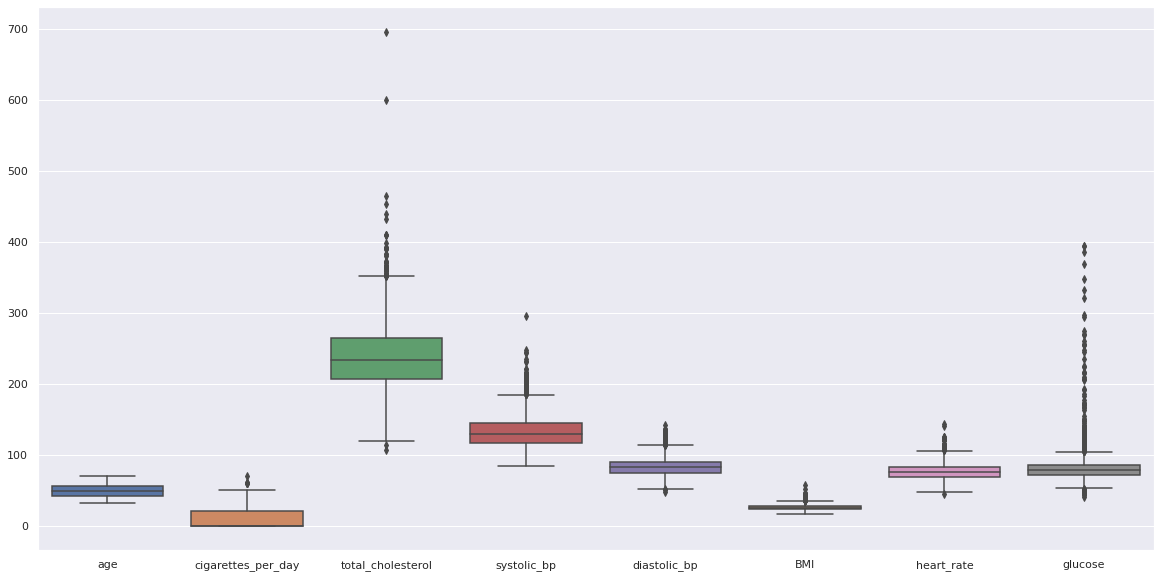

In [465]:
# boxplot for numerical columns
plt.figure(figsize=(20,10))
sns.boxplot(data= data[numerical_features])

Since, the extreme/outlier values of features in the dataset indicate the risk of cardiovascular problems that can be observed in the exploratory data analysis further, therefore, deleting/modifying the values wouldn't be a good thing to do. 

**Correlation Analysis**

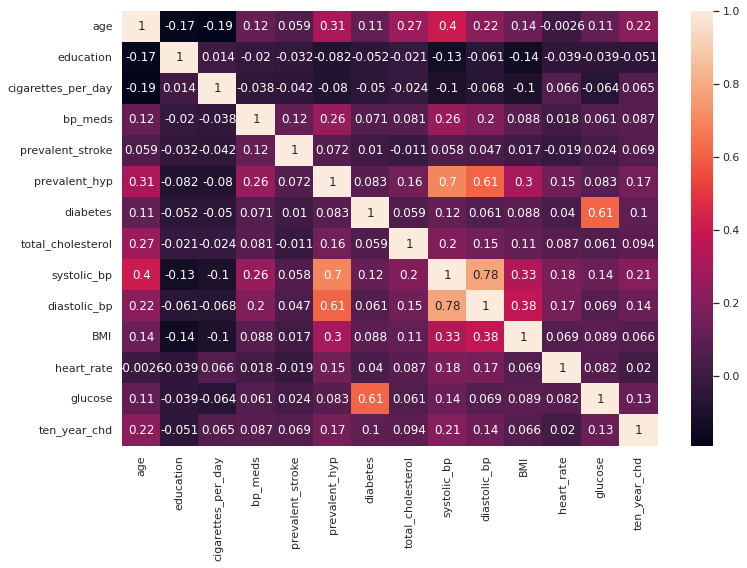

In [466]:
# plot the correlation matrix using heatmap
plt.figure(figsize=(12,8))
correlation = data.corr()
sns.heatmap(correlation, annot=True)

Observation:

* There is a slight positive correlation between ten_year_chd and features namely age, prevalent hypertension, diabetes, systolic_bp, diastolic_bp, glucose. 
* Independent variables are correlated among themselves.
  * High correlation of systolic bp and diastolic bp with prevalent hypertension.
  * High value of glucose levels may indicate diabetes with correlation (0.61).
  * Systolic and diastolic blood pressure are highly correlated(0.78): New feature could be derived using the two features.

##**Exploratory Data Analysis**

0    2879
1     511
Name: ten_year_chd, dtype: int64

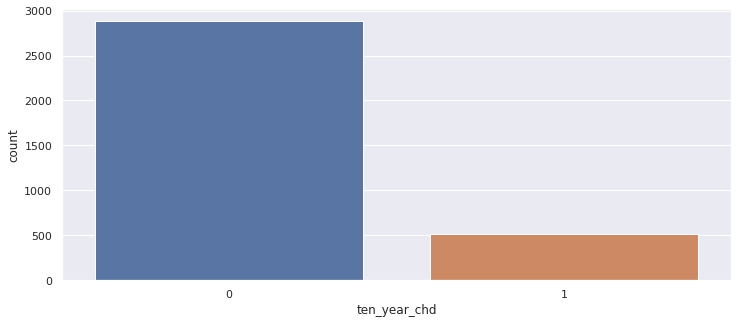

In [467]:
# dependent variable analysis
sns.countplot(data['ten_year_chd'])
data['ten_year_chd'].value_counts()

* The dependent variable is binary(categoric). Hence, a classification problem.
* There is an imbalalance in the dataset, that should be taken into consideration during further analysis.


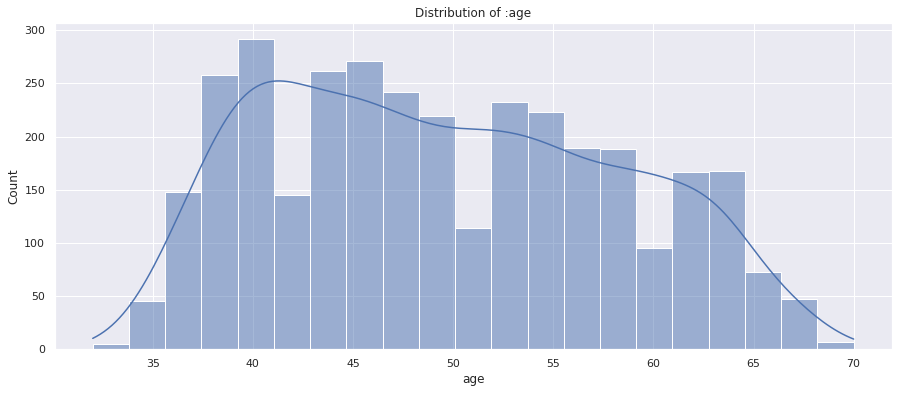

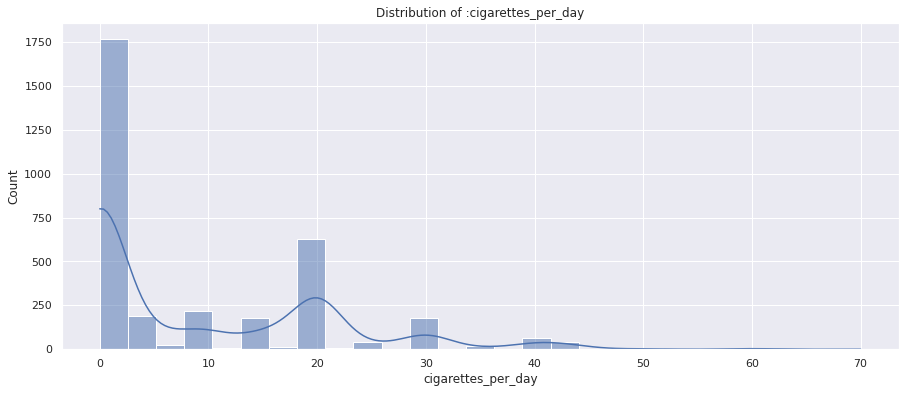

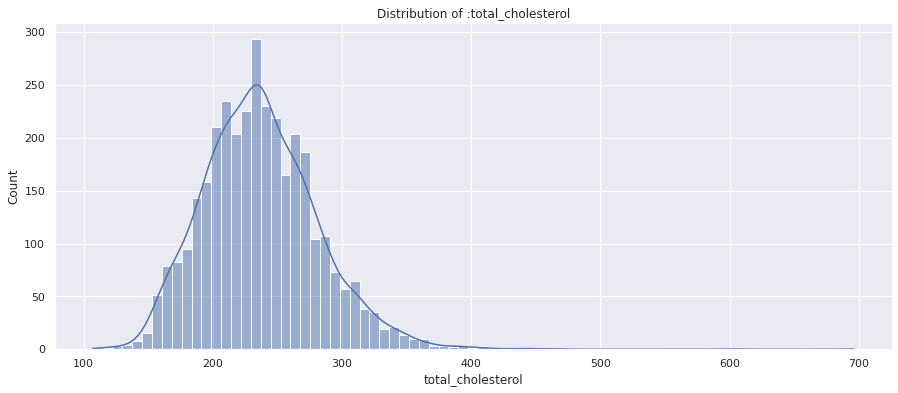

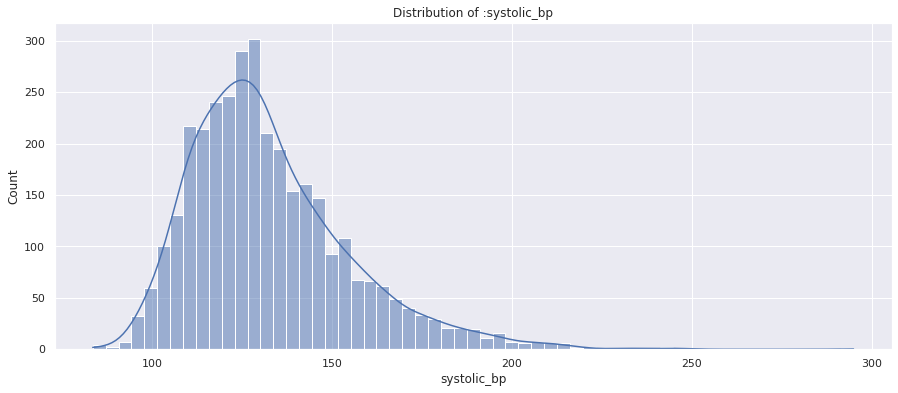

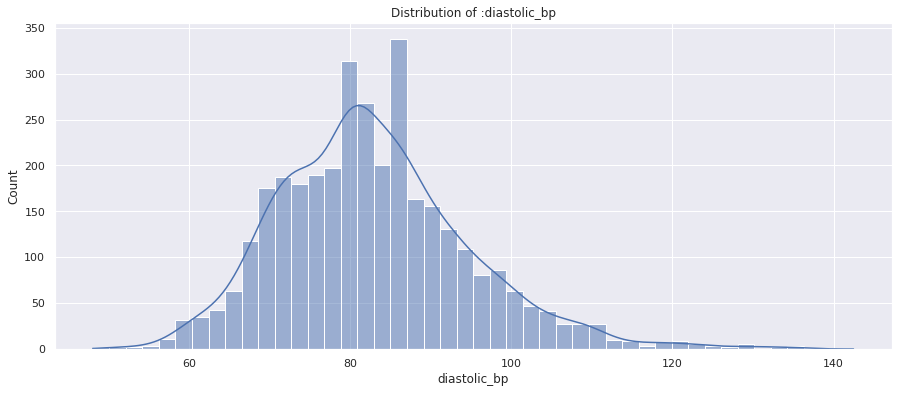

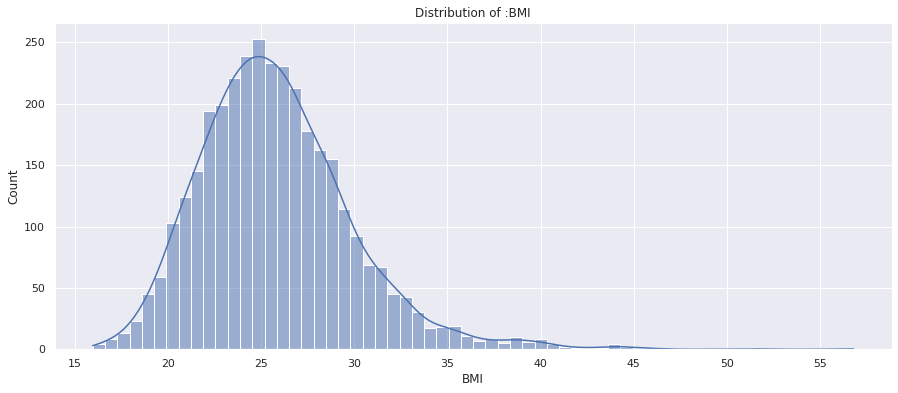

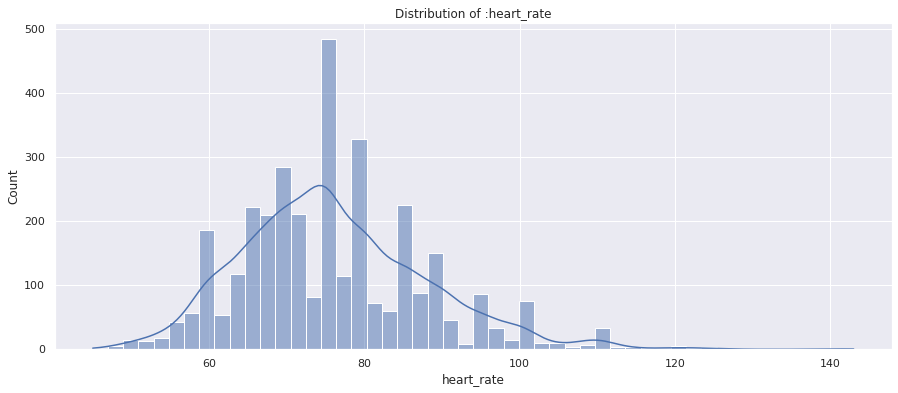

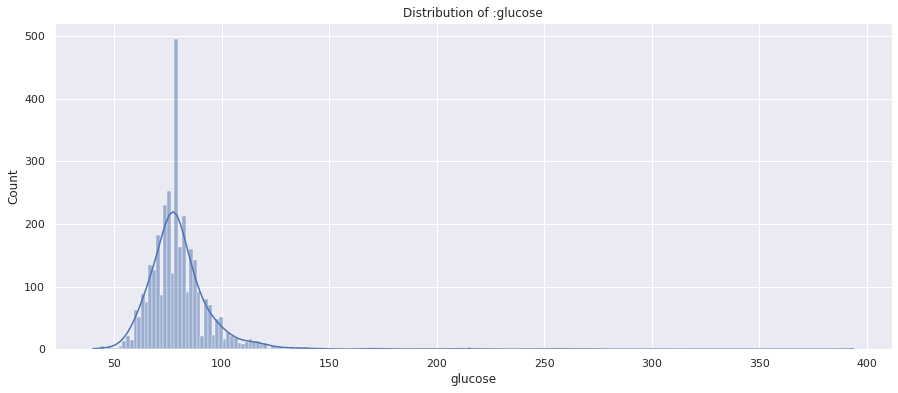

In [468]:
# independent numerical feature variable analysis using histogram 
for feature in numerical_features:
  plt.figure(figsize=(15,6))
  sns.histplot( x = data[feature], kde = True)
  plt.title('Distribution of :' +feature)
  plt.show()

Observation:

* The data is collected for patients of agegroup -> 35-70.
* Most of the patients are non-smokers.
* Features- 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'glucose', 'BMI' are rightly skewed.

In [469]:
# independent categorical features analysis using count and barplot

def plot_percentage(data,categorical_features):
  ''' function to plot the count and percentage of patients at the risk of coronary heart disease based on different categorical features'''

  for feature in categorical_features:
    plt.rcParams["figure.figsize"] = [12,5]
    f, axes = plt.subplots(1, 2)
    sns.countplot(x=feature,hue='ten_year_chd',data=data,ax=axes[0])  

    x_var, y_var = feature, 'ten_year_chd'
    data_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    sns.set()
    data_grouped.plot(kind='bar', stacked=True,ax=axes[1])
    plt.legend(bbox_to_anchor=(1.05, 1),loc="upper left",title=y_var)

    plt.title("Analysis of count and percentage of patients at the risk of coronary heart disease based on feature: "+ feature)
    for ix, row in data_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(ix,cumulative + element / 2,f"{int(element)} %",va="center",ha="center")
            cumulative += element
    plt.show()


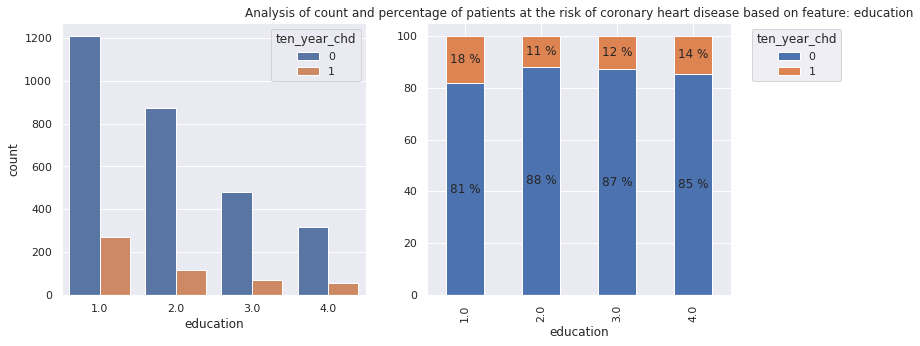

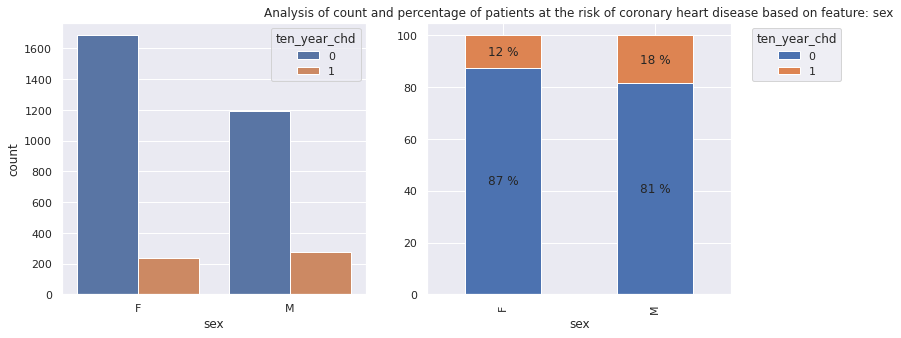

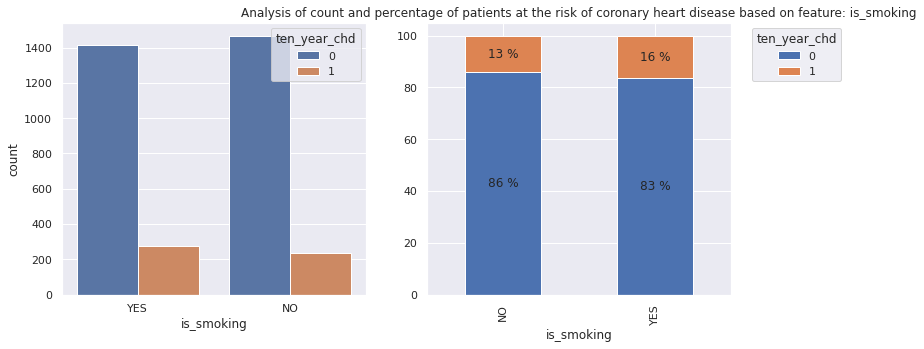

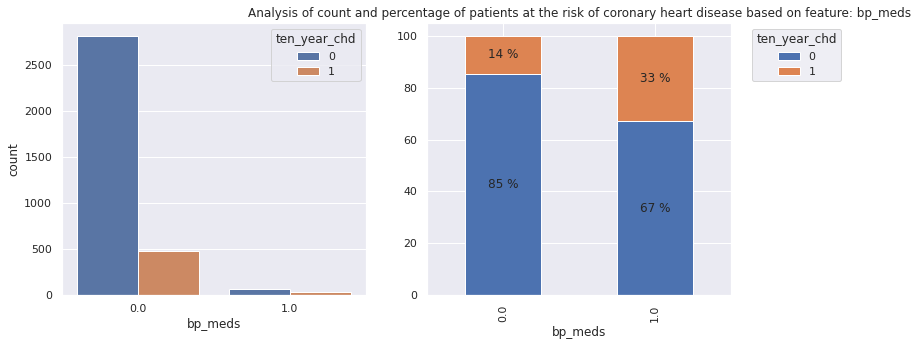

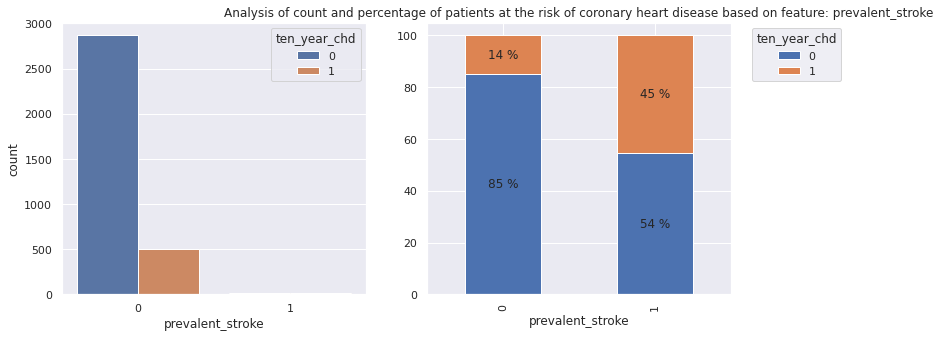

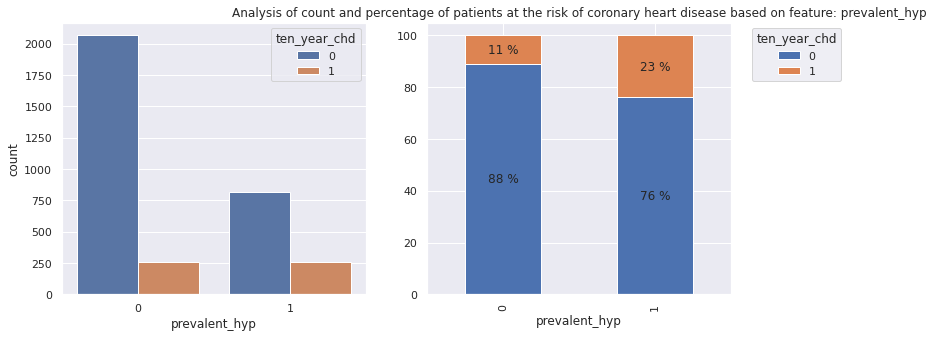

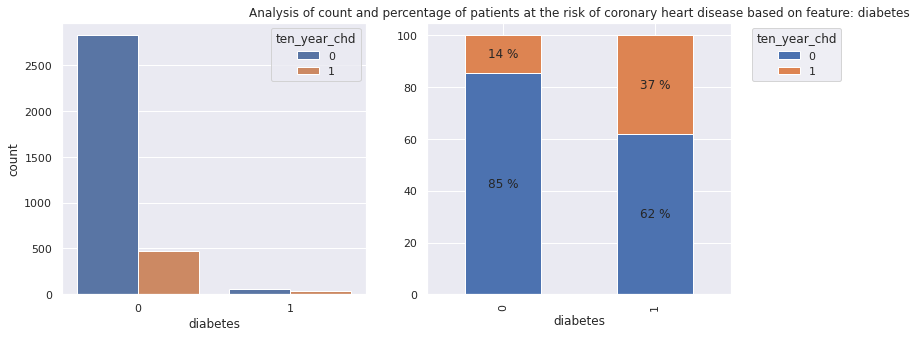

In [470]:
plot_percentage(data,categorical_features)

Observation:

* Most of the patients posses education of level 1. The risk of the coronary heart disease is maximum in patients of education level 1, followed by patients of education level 4, 3, 2.
* The count of female patients is more. Whereas, the risk of the coronary heart disease is higher in male patients by 6%.
* There are almost equal number of smoking and non-smoking patients. The risk of disease is higher in smokers by 3%.
* Patients who are on blood pressure medication have significantly higher risk of coronary heart disease i.e., 33%.
* Prevalent stroke is rarely seen in patients. But the risk of coronary heart disease among them is significantly higher (45%), that is 31% higher than the others.
* Hypertension is seen in many patients (~800). Patients with prevalent hypertension are at higher risk by 12%.
* Out of the very few patients with diagonized with diabetes, 37% of them are at risk of coronary heart disease.

In [471]:
# function to measure the heart rate of patients.
def heart_rate_measure(observation):
  ''' classifies the heart rate of patients into three different categories namely low, normal, and high'''
  
  if observation['heart_rate'] <= 59:
      value = 'Low'
  elif observation['heart_rate'] < 100:
      value = 'Normal'
  else:
      value = 'High'
  return value

In [472]:
# assign a copy of data and apply the transformation on column- 'heart_rate' by making a call to above function.
data1=data.copy(deep=True)
data1['heart_rate'] = data1.apply(heart_rate_measure, axis = 1)

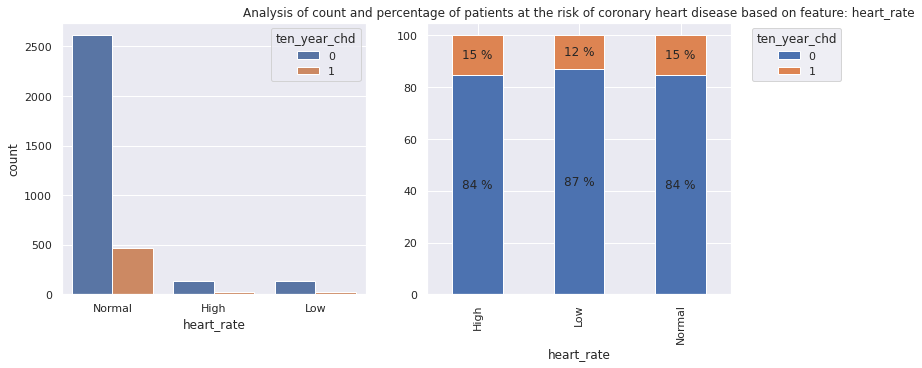

In [473]:
# function call to plot the count and percentage of patients at risk based on the different category of heartbeat.
plot_percentage(data1,['heart_rate'])


* The risk of the coronary heart disease is higher by 3% for patients with high and normal heartbeat compared to that of low heartbeat.

* The type of heart_rate doesn't seem to affect the risk of coronary heart disease significantly.

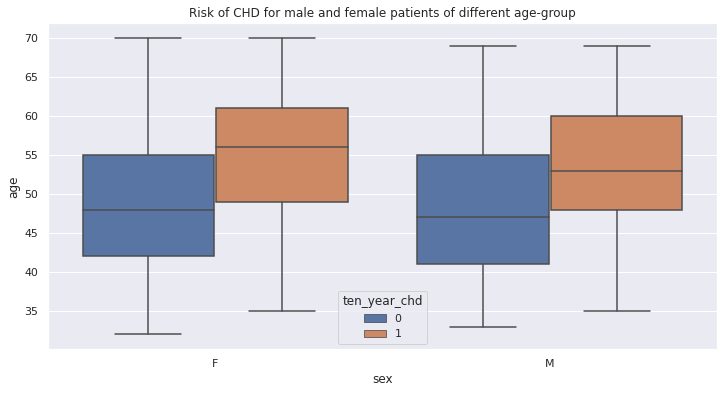

In [474]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data['sex'], y = data['age'], hue =data['ten_year_chd'])
plt.title("Risk of CHD for male and female patients of different age-group")
plt.show()

Female patients of agegroup (49-62) and Male patients of agegroup (48-60) are vulnerable to the risk of CHD.
The average age of risk of CHD is higher in female patients.


##**Feature Engineering**

In [475]:
data

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


Encoding

In [476]:
# encoding binary values for categorical columns- 'sex' and 'is_smoking'
data['sex']=np.where(data['sex']=='M',1,0)
data['is_smoking']=np.where(data['is_smoking']=='YES',1,0)
data.head()

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Feature Selection: Correlation Analysis

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. Also, the change in one of them could hamper the effect of other on the dependent variable.  

So, when two features have high correlation, either one of them could be dropped or a new feature can be produced using the two. The latter is implemented in this case.

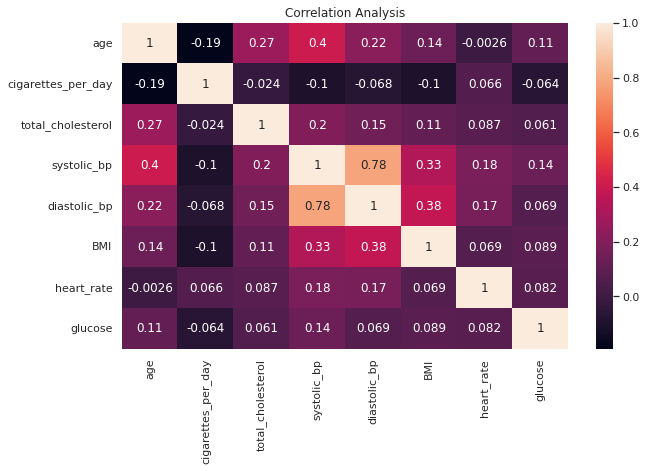

In [477]:
# check for correlation among numerical features and try to eliminate the highly correlated independent features.
plt.figure(figsize=(10,6))
plt.title('Correlation Analysis')
correlation = data[numerical_features].corr()
sns.heatmap(correlation,annot=True)

The features- 'systolic_bp' and 'diastolic_bp' are highly correlated. Hence these two features can be replaced by their difference, called **Pulse Pressure.**

Pulse pressure is the difference between the upper and lower numbers of blood pressure. Pulse pressure tends to increase as one gets older, and this number can also be an indicator of health problems before the symptoms are developed.

***Pulse Pressure*** = ***Systolic Blood Pressure*** - ***Diastolic Blood Pressure***

Normal value: 40mmHg i.e., if blood pressure is 120/80 mmHg.


In [478]:
# add the new feature and delete the features systolic and diastolic bp.
data['pulse_pressure'] = data['systolic_bp'] - data['diastolic_bp']
data.drop(['systolic_bp','diastolic_bp'], axis = 1, inplace = True)


In [479]:
numerical_features= list(set(numerical_features)-set(['systolic_bp','diastolic_bp'])) + ['pulse_pressure']


To check whether the variables are related a Null Hypothesis is defined.

**Null Hypothesis (H0)**: Two variables are not independent.

**Alternate Hypothesis (H1)**: Two variables are independent.

If a variable exibits p_value smaller than 0.05 for 95% confidence interval, it shows the indedependency, we reject the null hypothesis, and accept the alternate hypothesis. By this we may choose to either drop the column with high p-value, or handle it in some other way.

In feature selection, we aim to select the features which are highly dependent on the response. 
**Scores based on statistical tests such as Chi-Square and F-Statistic, provide a p-value, that may be used to rule out some features.**

* Further p_value is used to define the feature selection quantitatively. A p-value is a statistical measurement used to validate a hypothesis against observed data.
* A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.
 
* A p-value of 0.05 or lower is generally considered statistically significant.
    * A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected.
    * A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

Feature Selection: Chi-Square Test

A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

The formula for Chi-Square is given by:


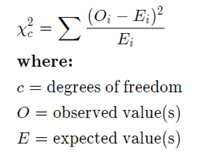

Higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.


In [480]:
# Chi-Square test is used to test the independence in categorical features.
from sklearn.feature_selection import chi2
X = data[categorical_features]
y = data['ten_year_chd']
chi_scores = chi2(X,y)

In [481]:
# the Chi-Square function returns a tuple of two lists. The first element is the list of Chi_scores and the second is the list of p_values.
chi_scores

(array([ 4.76184162, 13.77838959,  1.98522603, 25.10243827, 15.8619983 ,
        64.37770831, 35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 1.58840936e-01, 5.43640748e-07,
        6.81331780e-05, 1.02713702e-15, 2.54226209e-09]))

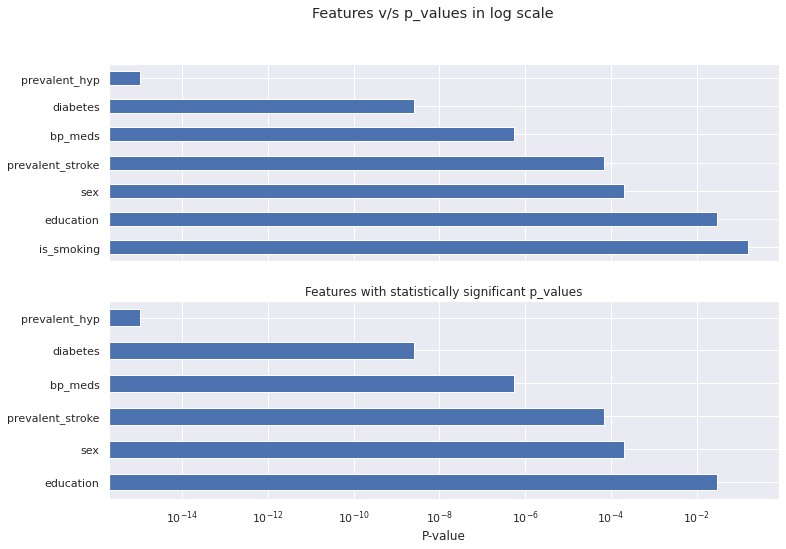

In [482]:
 # The Features are plotted against the p_values(in log scale) after the Chi-Square Test

p_values = pd.Series(chi_scores[1],index = X.columns)# access the first element of the returned tuple.
p_values.sort_values(ascending = False , inplace = True)

fig, axs = plt.subplots(2, figsize = (12,8),sharex=True)
fig.suptitle('Features v/s p_values in log scale')
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh(ax=axs[0])


p_values_new = p_values[p_values<0.05]
# select the p_values that are < 0.05, to obtain the statistically significant features only.

plt.xscale('log')
plt.xlabel('P-value')
plt.title('Features with statistically significant p_values')
p_values_new.plot.barh(ax=axs[1])


* After selecting statistically significant p_values, features are plotted against the p_values<0.05.
    * Therefore feature 'is_smoking' is dropped, since the p_value associated with it is greather than 0.05.
    * By rejecting the null hypothesis, features namely *prevalent_hyp, diabetes, bp_meds, prevalent_stroke, sex, education* are considered for further analysis.

In [483]:
final_categorical_features= list(p_values_new.index)

In [484]:
# drop the feature 'is_smoking'
# also, feature 'cigarettes_per_day' includes the information provided by 'is_smoking', feature 'is_smoking' becomes redundant.
data.drop('is_smoking', axis = 1, inplace = True)


Feature Selection: Annova F-Test (F-Statistic)

The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test. Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

Similar to Chi-Square test, it provides a p_value, that is used to rule out features.

In [485]:
X=data[numerical_features]
from sklearn.feature_selection import f_classif
f_classif_values= f_classif(X, y)

In [486]:
# the F-test returns a tuple of lists. the first element is the list of f_classif values and the second element is the list of p_values.
f_classif_values

(array([ 14.2619753 ,   1.37849501,  14.88339492, 180.54002751,
         61.45164547,  29.94746835, 153.72825218]),
 array([1.61775892e-04, 2.40440190e-01, 1.16493985e-04, 3.86915119e-40,
        6.02929115e-15, 4.76161714e-08, 1.47537038e-34]))

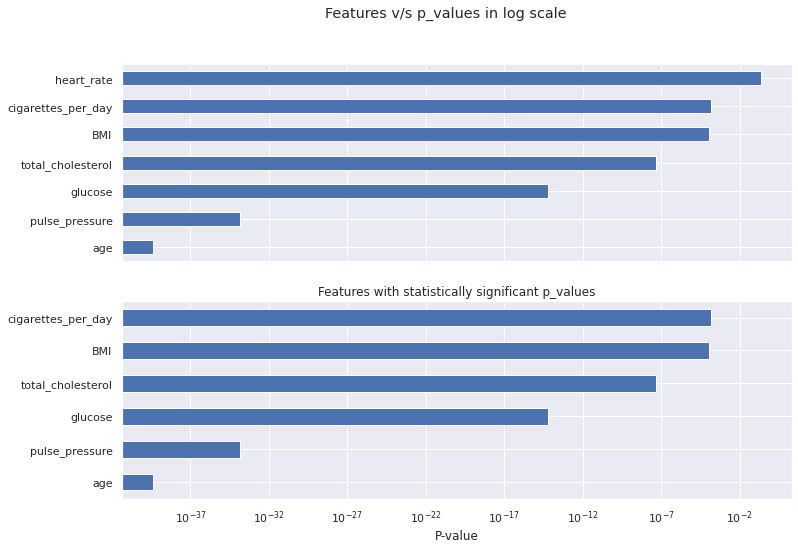

In [487]:
 # The Features are plotted against the p_values(in log scale) after the F-Test

p_values = pd.Series(f_classif_values[1]) # access the first element of the returned tuple.
p_values.index = data[numerical_features].columns
p_values.sort_values(ascending = True, inplace = True)


fig, axs = plt.subplots(2, figsize = (12,8),sharex=True)
fig.suptitle('Features v/s p_values in log scale')
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for continuous features')
p_values.plot.barh(ax=axs[0])

# select the p_values that are < 0.05, to obtain the statistically significant features only.
p_values_new = p_values[p_values<0.05]

plt.xscale('log')
plt.xlabel('P-value')
plt.title('Features with statistically significant p_values')
p_values_new.plot.barh(ax=axs[1])

* After selecting statistically significant p_values, features are plotted against the p_values<0.05.
    * Therefore feature 'heart_rate' is dropped, since the p_value associated with it is greather than 0.05.
    * By rejecting the null hypothesis, features namely *cigarettes_per_day, BMI, total_cholesterol, glucose, pulse_pressure, age* are considered for further analysis.

In [488]:
final_numerical_features= list(p_values_new.index)

In [489]:
# drop the feature- 'heart_rate'
data.drop('heart_rate', axis = 1, inplace = True)


## **Data Preparation**

In [490]:
dependent_variable='ten_year_chd'
# obtain the independent features from finalized features.
independent_variables= final_numerical_features + final_categorical_features
independent_variables

['age',
 'pulse_pressure',
 'glucose',
 'total_cholesterol',
 'BMI',
 'cigarettes_per_day',
 'education',
 'sex',
 'prevalent_stroke',
 'bp_meds',
 'diabetes',
 'prevalent_hyp']

In [491]:
# cleaned data (with selected features) that is considered for preparation of modeling
data.head()

,age,education,sex,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,BMI,glucose,ten_year_chd,pulse_pressure
id,,,,,,,,,,,,,
0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,94.0,0,45.0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,28.26,94.0,1,70.0
4,64,1.0,0,30.0,0.0,0,0,0,241.0,26.42,77.0,0,51.5


Data Splitting 

In [492]:
X=data[independent_variables]
y=data[dependent_variable]

In [513]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [514]:
X_train.head()

,age,pulse_pressure,glucose,total_cholesterol,BMI,cigarettes_per_day,education,sex,prevalent_stroke,bp_meds,diabetes,prevalent_hyp
id,,,,,,,,,,,,
1071,39,30.5,71.0,250.0,29.23,0.0,2.0,0,0,0.0,0,0
3250,60,102.0,59.0,294.0,24.22,20.0,2.0,0,0,1.0,0,1
2893,55,57.0,66.0,281.0,24.14,20.0,1.0,1,0,0.0,0,1
1655,49,53.0,65.0,305.0,26.29,10.0,3.0,1,0,0.0,0,0
1419,41,93.0,75.0,306.0,38.75,43.0,1.0,0,0,0.0,0,1


In [515]:
y_train.head()

id
1071    0
3250    0
2893    0
1655    0
1419    0
Name: ten_year_chd, dtype: int64

Oversampling: SMOTE

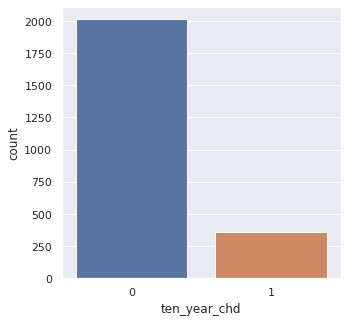

In [516]:
# visualize the dependent variable used in training
plt.figure(figsize=(5,5))
sns.countplot(y_train)


Due to large difference in number of observations of both the types of dependent variable, it becomes **Imbalanced Classification**.
Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

* One approach to addressing imbalanced datasets is to oversample the minority class. 
* The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples.
* This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique**, or **SMOTE** for short.

**SMOTE: Synthetic Minority Oversampling Technique**

* SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. 
* The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. 
* The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [517]:
#import SMOTE 
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit resampler on train data. Test data is not oversampled, beacuse the goal is to train a model that predicts well real data, not synthetic ones.
X_train_oversample, y_train_oversample = smote.fit_resample(X_train, y_train)


In [518]:
print("Original training data shape:")
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)

print("Shape of training data after SMOTE:")
print("X_oversample:",X_train_oversample.shape)
print("y_oversample:",y_train_oversample.shape)

Original training data shape:
X_train: (2373, 12)
y_train: (2373,)
Shape of training data after SMOTE:
X_oversample: (4022, 12)
y_oversample: (4022,)


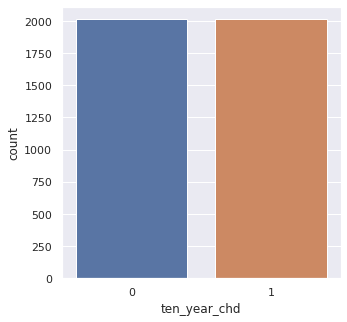

In [519]:
# visualize the dependent variable(after oversampling) used in training
plt.figure(figsize=(5,5))
sns.countplot(y_train_oversample)

In [520]:
X_train_oversample.head()

,age,pulse_pressure,glucose,total_cholesterol,BMI,cigarettes_per_day,education,sex,prevalent_stroke,bp_meds,diabetes,prevalent_hyp
0,39,30.5,71.0,250.0,29.23,0.0,2.0,0,0,0.0,0,0
1,60,102.0,59.0,294.0,24.22,20.0,2.0,0,0,1.0,0,1
2,55,57.0,66.0,281.0,24.14,20.0,1.0,1,0,0.0,0,1
3,49,53.0,65.0,305.0,26.29,10.0,3.0,1,0,0.0,0,0
4,41,93.0,75.0,306.0,38.75,43.0,1.0,0,0,0.0,0,1


In [521]:
y_train_oversample.head()

0    0
1    0
2    0
3    0
4    0
Name: ten_year_chd, dtype: int64

Feature Scaling 

The objective of feature scaling is to enclose all features in a common boundary without losing information. 

The three things that define the features are the units, magnitude, and range. Most of the times, dataset contains features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use distance between two data points in their computations, this is a problem. To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

* Tree based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.
* Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.



In the given classification problem, Standard Scaler is used, that is defined as:

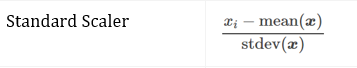

In [522]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler 
scaler = StandardScaler()

# the scaler is fit using the training set only and then applying the transform to both the training and testing set.
X_train_oversample_scaled = scaler.fit_transform(X_train_oversample)
X_train_data = pd.DataFrame(X_train_oversample_scaled)

# convert to dataframe
X_test_scaled = scaler.transform(X_test)
X_test_data = pd.DataFrame(X_test_scaled)

In [523]:
y_train_data= y_train_oversample
y_test_data=y_test

In [524]:
X_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.471608,-1.427878,-0.426332,0.229478,0.811145,-0.782625,0.125130,-0.805208,-0.063198,-0.235636,-0.182762,-0.693437
1,1.022872,3.176678,-0.818360,1.234379,-0.478076,0.868327,0.125130,-0.805208,-0.063198,5.273703,-0.182762,1.442093
2,0.428948,0.278705,-0.589677,0.937476,-0.498663,0.868327,-0.918678,1.241914,-0.063198,-0.235636,-0.182762,1.442093
3,-0.283760,0.021108,-0.622346,1.485604,0.054596,0.042851,1.168939,1.241914,-0.063198,-0.235636,-0.182762,-0.693437
4,-1.234038,2.597083,-0.295656,1.508443,3.260921,2.766922,-0.918678,-0.805208,-0.063198,-0.235636,-0.182762,1.442093


In [545]:
# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split
# Importing libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [546]:
# Creating a dictionary for models
models = {'Logistic Regression' : LogisticRegression(),
              'Random Forest' : RandomForestClassifier(),
              'Gaussian_classifier':GaussianNB(),
              'Decision Tree Classifier': DecisionTreeClassifier(),
              'KNN' : KNeighborsClassifier(),
              'SVC' : SVC(probability=True),
              'XGB Classifier' : XGBClassifier(),
}

In [547]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  
  # Creating a dataframe
  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  # Creating necessary dictionaries
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:,1]
    
  # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    

  return model_df, train_confusion_matrix, test_confusion_matrix, curve

In [548]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= model_build(X_train_data, y_train_data, X_test_data, y_test_data, models)

In [549]:
# Models and their scores
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regression,0.677275,0.653884,0.674841,0.226415,0.684237,0.563758,0.677275,0.616557
1,Random Forest,1.000000,0.816126,1.000000,0.310000,1.000000,0.208054,1.000000,0.564280
2,Gaussian_classifier,0.598956,0.792527,0.707724,0.301282,0.337146,0.315436,0.598956,0.594930
3,Decision Tree Classifier,1.000000,0.729597,1.000000,0.205607,1.000000,0.295302,1.000000,0.549725
4,KNN,0.857782,0.647984,0.809729,0.205634,0.935356,0.489933,0.857782,0.582524
5,SVC,0.762059,0.639135,0.740639,0.195531,0.806564,0.469799,0.762059,0.569001
6,XGB Classifier,0.854550,0.805310,0.904195,0.318519,0.793138,0.288591,0.854550,0.591300


In [550]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[1348  663]
 [ 635 1376]]
********************
Model : Random Forest
[[2011    0]
 [   0 2011]]
********************
Model : Gaussian_classifier
[[1731  280]
 [1333  678]]
********************
Model : Decision Tree Classifier
[[2011    0]
 [   0 2011]]
********************
Model : KNN
[[1569  442]
 [ 130 1881]]
********************
Model : SVC
[[1443  568]
 [ 389 1622]]
********************
Model : XGB Classifier
[[1842  169]
 [ 416 1595]]
********************


In [551]:
# Test confusion matrix
for name, matrix in test_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[581 287]
 [ 65  84]]
********************
Model : Random Forest
[[799  69]
 [118  31]]
********************
Model : Gaussian_classifier
[[759 109]
 [102  47]]
********************
Model : Decision Tree Classifier
[[698 170]
 [105  44]]
********************
Model : KNN
[[586 282]
 [ 76  73]]
********************
Model : SVC
[[580 288]
 [ 79  70]]
********************
Model : XGB Classifier
[[776  92]
 [106  43]]
********************


Text(0.5, 1.0, 'ROC CURVE')

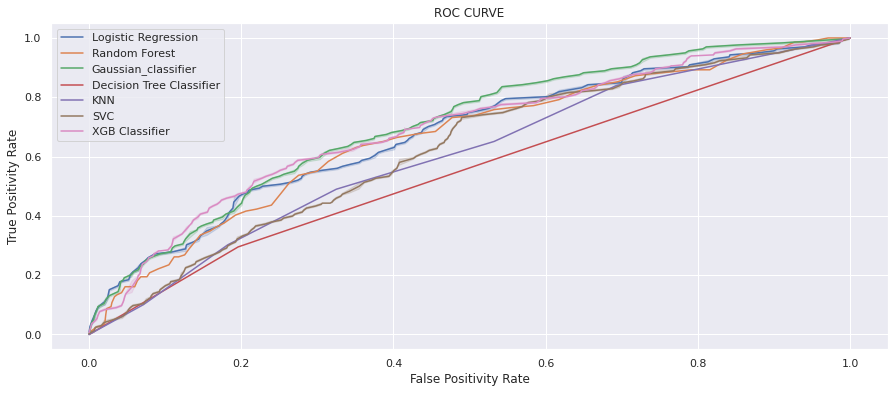

In [552]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

In [553]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [554]:

# Creating a function for hyperparameter tuning
def grid_fitting(name, hyperparams, estim):
  '''Returns a dataframe with scores of the model post hyperparameter tuning along with best model and confusion matrix for train and test '''
  
  grid_df = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])

  grid = GridSearchCV(estimator= estim, param_grid = hyperparams, cv = 5, scoring = 'recall', verbose=1)

  grid.fit(X_train,y_train)

  best_model = grid.best_estimator_

  train_grid = best_model.predict(X_train)
  test_grid = best_model.predict(X_test)

  grid_train_accuracy = accuracy_score(y_train, train_grid)
  grid_test_accuracy = accuracy_score(y_test, test_grid)
  grid_train_precision = precision_score(y_train, train_grid)
  grid_test_precision = precision_score(y_test, test_grid)
  grid_train_recall = recall_score(y_train, train_grid)
  grid_test_recall = recall_score(y_test, test_grid)
  grid_train_roc_auc = roc_auc_score(y_train, train_grid)
  grid_test_roc_auc = roc_auc_score(y_test, test_grid)

  grid_df = grid_df.append({'Model': name,
                           'Train Accuracy' : grid_train_accuracy,
                           'Test Accuracy': grid_test_accuracy,
                           'Train Precision' : grid_train_precision,
                           'Test Precision' : grid_test_precision,
                           'Train Recall' : grid_train_recall,
                           'Test Recall' : grid_test_recall,
                           'Train ROC AUC' : grid_train_roc_auc,
                           'Test ROC AUC' : grid_test_roc_auc},
                           ignore_index = True)
  
  grid_train_cm = confusion_matrix(y_train, train_grid)
  grid_test_cm = confusion_matrix(y_test, test_grid)


  return best_model, grid_df, grid_train_cm, grid_test_cm

In [587]:
rf_params = {'n_estimators':[500],                   
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}
rf_best_model, rf_df, rf_grid_train_cm, rf_grid_test_cm = grid_fitting('rf', rf_params, RandomForestClassifier(random_state=0))


In [588]:
rf_best_model

RandomForestClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1,
                       n_estimators=500, random_state=0)

In [589]:
rf_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,rf,0.84745,0.853491,0.0,0.0,0.0,0.0,0.5,0.5


In [584]:
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }
svm_best_model, svm_df, svm_grid_train_cm, svm_grid_test_cm = grid_fitting('svm', svm_params,SVC())


In [585]:
svm_best_model

SVC(C=10, gamma=0.001)

In [586]:
svm_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,svm,0.885377,0.850541,0.978723,0.454545,0.254144,0.100671,0.626575,0.539967


In [581]:

dt_params = {'max_depth':np.arange(1,20),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }
dt_best_model, dt_df, dt_grid_train_cm, dt_grid_test_cm = grid_fitting('NB', dt_params,DecisionTreeClassifier())


In [582]:
dt_best_model

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [583]:
dt_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,NB,0.84745,0.853491,0.0,0.0,0.0,0.0,0.5,0.5


In [578]:
nb_params = {'var_smoothing': np.logspace(0,-100, num=500)}
nb_best_model, nb_df, nb_grid_train_cm, nb_grid_test_cm = grid_fitting('NB', nb_params,GaussianNB())


In [579]:
nb_best_model

GaussianNB(var_smoothing=9.771921283717997e-06)

In [580]:
nb_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,NB,0.819638,0.836775,0.328125,0.392405,0.174033,0.208054,0.554943,0.576377


In [555]:
# Hyperparameter dictionary
xgb_param_dict ={'n_estimators' : [300,350],
                'max_depth': [7,8,9],
                'learning_rate': [0.01, 0.001]
                 }
xgb_best_model, xgb_df, xgb_grid_train_cm, xgb_grid_test_cm = grid_fitting('XGB', xgb_param_dict, XGBClassifier())


In [556]:
xgb_best_model

XGBClassifier(learning_rate=0.001, max_depth=9, n_estimators=350)

In [557]:
xgb_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,XGB,0.894648,0.827925,0.878378,0.30303,0.359116,0.134228,0.675083,0.540616


In [566]:
grid_params = { 'n_neighbors' : list(range(60)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_best_model, knn_df, knn_grid_train_cm, knn_grid_test_cm = grid_fitting('KNN', grid_params, KNeighborsClassifier())

# gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [567]:
knn_best_model

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [568]:
knn_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,KNN,1.0,0.780728,1.0,0.26875,1.0,0.288591,1.0,0.576899
